# Script for Fig. 2E NVS et al. (2021)

In [1]:
import json
import numpy as np
from copy import deepcopy
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
import os
from matplotlib import cm
import sys
sys.path.insert(0, '/Users/natvan/CortexControl.app/Contents/MacOS/teili/')

from teili.tools.visualizer.DataViewers import PlotSettings
from teili.tools.visualizer.DataModels import EventsModel, StateVariablesModel
from teili.tools.visualizer.DataControllers import DataController, LineplotController, RasterplotController
from utils_natacha_3 import get_meanfiringrate_from_network_activity,get_network_activity_as_matrix, SpikeEvents, load_recordings_into_spikeevents

DC = DataController()

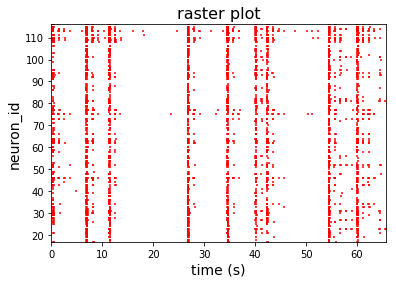

<Figure size 432x288 with 0 Axes>

In [3]:
path_to_recording = '/Users/natvan/CortexControl_Study/rec/TEST/newb/code_updated//111347_OD1_CODE_UPDATED.json'


with open(path_to_recording) as f:
    recording = json.load(f)

column_name = 'column3'
neuron_ids_col3 = list(range(17, 116+1))
neuron_ids_col3.remove(61)
neuron_ids_col3.remove(107)
neuron_ids_col3.remove(90)
neuron_ids_col3.remove(74)
neuron_ids_col3.remove(65)
neuron_ids_col3.remove(47)
neuron_ids_col3.remove(57)


all_active_neuron_ids = {column_name: neuron_ids_col3}
min_neuron_id = np.min(all_active_neuron_ids[column_name])
max_neuron_id = np.max(all_active_neuron_ids[column_name])

# filter for events from Column3 and create SpikeEvent-DataStructure in network_acitivites_org
network_activity_org = {column_name: SpikeEvents(neuron_id=[], ts=[])}
for neuron_id, spike_time in zip(recording['neuron_ids'], recording['spike_times']):
    if neuron_id in all_active_neuron_ids[column_name]:
        network_activity_org[column_name].neuron_id.append(neuron_id)
        network_activity_org[column_name].ts.append(spike_time*(10**-6))

# create rasterplot
eventsmodel  = EventsModel(neuron_ids=network_activity_org['column3'].neuron_id,
                           spike_times=network_activity_org['column3'].ts)
RasterplotController([eventsmodel], xlabel='time (s)', ylabel='neuron_id',
                     neuron_id_range=(min_neuron_id, max_neuron_id))
plt.tight_layout()

In [5]:
with open(path_to_recording) as f:
    recording = json.load(f)

column_name = 'column3'
neuron_ids_col3 = list(range(17, 116+1))
neuron_ids_col3.remove(61)
neuron_ids_col3.remove(107)
neuron_ids_col3.remove(90)
neuron_ids_col3.remove(74)
neuron_ids_col3.remove(65)
neuron_ids_col3.remove(47)
neuron_ids_col3.remove(57)


column_name = 'column2'
neuron_ids_col2 = list(range (529,617)) 
neuron_ids_col2.remove(610)
neuron_ids_col2.remove(599)
neuron_ids_col2.remove(594)
neuron_ids_col2.remove(546)
neuron_ids_col2.remove(537)
neuron_ids_col2.remove(532)

column_name = 'column4'
neuron_ids_col4 = list(range (374,463))
neuron_ids_col4.remove(426)
neuron_ids_col4.remove(379)
neuron_ids_col4.remove(438)
neuron_ids_col4.remove(407)
neuron_ids_col4.remove(403)

max_neuron_id = 2389

network_activity = deepcopy(network_activity_org)

rec_name_rec = 'column3'
all_active_neuron_ids[rec_name_rec] = neuron_ids_col3
network_activity_org = {rec_name_rec: load_recordings_into_spikeevents(path_to_recording=path_to_recording, 
                                                    active_neuron_ids=all_active_neuron_ids[rec_name_rec])}

rec_name_std = 'column4'
network_activity_org[rec_name_std] = load_recordings_into_spikeevents(path_to_recording=path_to_recording, 
                                                         active_neuron_ids=neuron_ids_col4) #, column_core=core_nr_inh, column_chip=chip_nr_inh,reset_start_time=True, reset_neuron_ids=False)
all_active_neuron_ids[rec_name_std] = neuron_ids_col4

rec_name_dev = 'column2'
network_activity_org[rec_name_dev] = load_recordings_into_spikeevents(path_to_recording=path_to_recording, 
                                                     active_neuron_ids=neuron_ids_col2) #, column_core=core_nr_inh, column_chip=chip_nr_inh,reset_start_time=True, reset_neuron_ids=False)
all_active_neuron_ids[rec_name_dev] = neuron_ids_col2

with open(path_to_recording) as f:    
    recording = json.load(f)
    

all_column_names = [ 'column2', 'column3', 'column4']
all_active_neuron_ids = {'column2': neuron_ids_col2,'column3': neuron_ids_col3, 'column4': neuron_ids_col4}


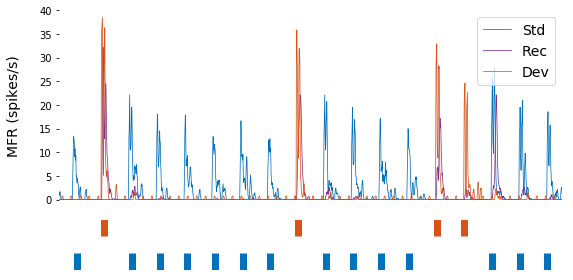

In [7]:
# to keep original throughout filtering actions
network_activity = deepcopy(network_activity_org)


# filter for time interval & normalize neuron_ids
t_start = 25.  # [s] 25
t_end   = 45. # [s]  45
for net_activity_org, net_activity in zip([network_activity_org], [network_activity]):
    for column_name, column_events in net_activity_org.items():
        net_activity[column_name].ts, net_activity[column_name].neuron_id = DC.filter_events(all_spike_times=column_events.ts, all_neuron_ids=column_events.neuron_id, interval=(t_start, t_end))

step_size = 0.01
window_size = 0.05
get_meanfiringrate_from_network_activity(network_activity=network_activity_org,
                                         max_neuron_id=max_neuron_id, t_start=t_start, t_end=t_end,
                                         step_size=step_size, window_size=window_size,
                                         pop_firing_rate=False,  active_neuron_ids=all_active_neuron_ids, pop_average=True)

# plot mfr over time with/without adaptation

#myplotsettings = PlotSettings(colors=['red','darkviolet','green'])
myplotsettings = PlotSettings(colors=np.asarray([[0, 0.4470, 0.7410], 
                             [0.4940, 0.1840, 0.5560], (0.8500, 0.3250, 0.0980),
                             ])) 

    
fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize=(8,4), sharex=True)
ax1 = plt.subplot2grid((4,1), (0,0), colspan=1, rowspan=3)
ax1.yaxis.set_label_coords(-0.075, 0.5)
ax1.set_xticks([])
ax2 = plt.subplot2grid((4,1), (3,0), colspan=1, rowspan=1)
column_events_std = network_activity_org[rec_name_std]
column_events_rec = network_activity_org[rec_name_rec]
column_events_dev = network_activity_org[rec_name_dev]
plt.rcParams['lines.linewidth'] = 0.75

data = [(column_events_std, ('t_mfr', 'mfr')),(column_events_rec, ('t_mfr', 'mfr')), 
        (column_events_dev, ('t_mfr', 'mfr'))]
LineplotController(DataModel_to_x_and_y_attr=data , subgroup_labels=['Std', 'Rec', 'Dev'],
                   y_range = [0, 40], x_range=(t_start, t_end), title = None,
                   xlabel=None, ylabel='MFR (spikes/s)', mainfig=fig, subfig=ax1, 
                   show_immediately=False,  MyPlotSettings= myplotsettings) 
for spine in ax1.spines.values():
    spine.set_visible(False)


# plot for stimulation times
t_offset_stim = 0.4
t_deviant_stim = [26.4, 34.1, 39.6, 40.7]  #  have to be multiples of 1.1
t_default_stim = np.around(np.arange(0, t_end, 1.1), 2)
t_default_stim = list(set(t_default_stim).difference(set(t_deviant_stim)))
StimulusEvents_f1 = EventsModel(neuron_ids=[0]*len(t_default_stim), spike_times=np.asarray(t_default_stim) + t_offset_stim)
StimulusEvents_f2 = EventsModel(neuron_ids=[1]*len(t_deviant_stim), spike_times=np.asarray(t_deviant_stim) + t_offset_stim)
RasterplotController(MyEventsModels=[StimulusEvents_f1, StimulusEvents_f2], neuron_id_range=(0,1),
                     xlabel=None, ylabel=None, title=None, mainfig=fig,  subfig_rasterplot=ax2, 
                     time_range=[t_start, t_end],
                     MyPlotSettings=PlotSettings(marker_size=1000, colors=[(0, 0.4470, 0.7410), 
                    (0.8500, 0.3250, 0.0980)]), show_immediately=False)

ax2.collections[0].set_linewidth(7)
ax2.collections[1].set_linewidth(7)

plt.subplots_adjust(hspace=1.3)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_yticklabels(['f1', 'f2'], fontsize=PlotSettings().fontsize_axis_labels)
for spine in ax2.spines.values():
    spine.set_visible(False)
plt.tight_layout()

plt.savefig('FIG8.pdf')